# 1.6 Проблема исчерпания запасов
Различные логистические модели широко используются при построении математических моделей биологических процессов. При решении экономических задач, связанных с влиянием человека, необходимо проверять,будут ли возникающие управляемые процессы устойчивыми.В. И. Арнольд, исследуя простую логистическую модель, описывающую динамику управляемой системы, показал, сколь опасно может бытьжесткое планирование при оптимизации параметров плана. Такая оптимизация может привести к вырождению системы вследствие возникающейнеустойчивости. Пусть количество карасей в пруду описывается уравнением 

$$\dot N = F(N)$$

Здесь $N(t)$ – количество карасей в момент времени $t$, функция $F(N)$ имеет два нуля $F(0)=F(L)=0$, причём при $N∈[0,L]$ она положительна, а во всех остальных случаях отрицательна.

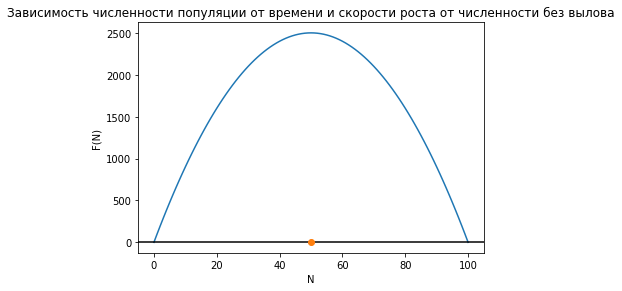

In [2]:
L = 100
def f(n):
    return -n*(n-L)
# n = 50, f(n) = 2500 -- максимум
    
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
axes = fig.add_axes([0.2, 0.1, 0.8, 0.8])
size = [i for i in range(L+1)]
func = [f(i) for i in size]
axes.plot(size, func)
axes.set_title('Зависимость численности популяции от времени и скорости роста от численности без вылова')
axes.set_xlabel('N')
axes.set_ylabel('F(N)')
plt.axhline(color='black')
axes.plot(50, 0, 'o')

plt.show()

 Нетрудно видеть, что существует два положения равновесия – неустойчивое тривиальное и асимптотически устойчивое $N=L$.
 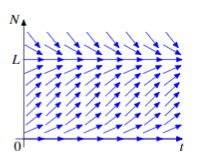

Предположим, что осуществляется регулярный вылов карасей. Определим, как отразится на численности рыб постоянный отбор с интенсивностью $c>0$. Рассмотрим уравнение

$$ \dot N = F(N)-c$$

Пусть $F(N^∗)$ – максимум функции $F(N)$.Если квота $c$ вылова рыбы достаточно мала $c < F(N^∗)$, то изменения (по сравнению со свободной популяцией, для которой $c= 0$) заключаются в следующем: уравнение имеет два равновесных состояния – $A$ и $B$.Состояние $B$ устойчиво: популяцияв этом случае несколько меньше, чем при $c=0$, но она восстанавливается при малых отклонениях $N$ от равновесного состояния $B$.Состояние $A$ неустойчиво: если вследствие какихлибо причин (например, браконьерства или мора) размер популяции упадет хоть немного ниже уровня $A$, то в дальнейшем она (хотя и медленно, если отличие от $A$ невелико) будет уничтожена полностью за конечное время. C увеличением квоты вылова состояния $A$ и $B$ приближаются друг кдругу и при критической квоте $c=F(N^∗)$ сливаются в одно неустойчивое положение равновесия. В случае же если квота вылова больше, чем критическая $c=F(N^∗)$, топопуляция $N$ уничтожается за конечное время, как бы велика она ни была в начальный момент. Например, такова судьба мамонтов, бизонов, многих видов китов.

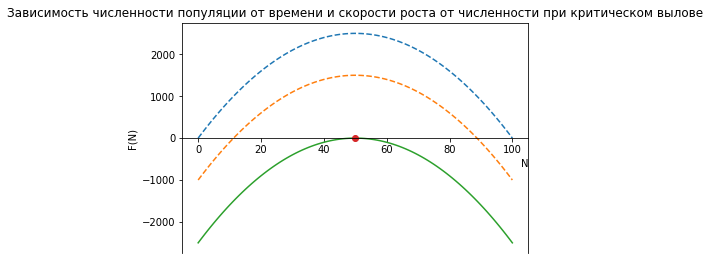

In [3]:
c1 = 1000
c2 = 2500
fig2 = plt.figure()
axes = fig2.add_axes([0.2, 0.1, 0.8, 0.8])
func1 = [f(i)-c1 for i in size]
func2 = [f(i)-c2 for i in size]
axes.plot(size, func, '--')
axes.plot(size, func1, '--')
axes.plot(size, func2)
axes.set_title('Зависимость численности популяции от времени и скорости роста от численности при критическом вылове')
axes.set_xlabel('N', position=(1, 1000), horizontalalignment='right')
axes.set_ylabel('F(N)')
axes.spines['bottom'].set_position('center')
# axes.text('')
axes.plot(50, 0, 'o')

plt.show()

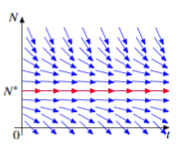

Отсюда видно, что выбор значения параметра c – чрезвычайно важный момент управления эксплуатацией популяции $N$.Стремясь к увеличению квоты эксплуатации $c$, разумная планирующая организация не должна превышать критический уровень $c=F(N^∗)$. Оптимизация приводит к выбору именно критического значения $c=F(N^∗)$, при котором эксплуатируемая популяция еще не уничтожена, но доход от эксплуатации за единицу времени достигает максимально возможного значения $c=F(N^∗)$ (больший доход в течение длительного времени невозможен, так как максимальная скорость прироста даже и неэксплуатируемой популяции равна $F(N^∗)$). Из рис. 1.9 видно, что произойдет при таком "оптимальном" выборе $c=F(N^∗)$. Какова бы ни была начальная популяция, с течением времени она выйдет на стационарный режим $A=B=c=N^∗$, который не устойчив. Небольшое случайное уменьшение $N$ приведет к полному уничтожению популяции за конечное время. Следовательно, оптимизация параметров плана может привести (и приводит во многих случаях, из которых данная модель – лишь простейший пример) к полному уничтожению эксплуатируемой популяции вследствие возникающей из-за оптимизации неустойчивости. Однако мягкая модель (при всей своей очевидной примитивности) предлагает способы борьбы с указанным злом. Оказывается, устойчивость восстанавливается, если заменить жесткое планирование обратной связью. Иными словами, решение о величине эксплуатации (квоты вылова или отстрела какихто животных, налогового пресса и т. д.) следует принимать недирективно (c=const), а в зависимости от достигнутого состояния системы: $c=kN$, где параметр $k$ (дифференциальная квота) подлежит выбору. В этом случае модель принимает вид

$$  \dot N = F(N) - kN $$

Средний многолетний доход $c=kN$ оптимален, если прямая $y=kN$ проходит через максимум кривой $y=F(N)$. При таком выборе дифференциальной квоты $k$ средний доход $c=kN^∗=F(N^∗)$ достигает максимально возможного значения. Таким образом, приходим к уравнению

$$ \dot N = F(N)  \frac{F(N^*)}{N^*}N.$$

В отличие от жестко планируемой системы, система с обратной связью устойчива при оптимальном значении коэффициента $k$ (небольшое случайное уменьшение по отношению к стационарному уровню $N=N^∗$ приводит к автоматическому восстановлению стационарного уровня силами самой системы). Более того, небольшое отклонение коэффициента $k$ от оптимального значения $k= \frac {F(N^∗)}{N^∗} $ приведет не к самоуничтожению системы (как это было при небольшом отклонении от оптимального жесткого плана $c$), а лишь к небольшому уменьшению дохода (рис. 1.10). Итак, введение обратной связи (т. е. зависимости принимаемых решений от реального состояния дел, а не только от планов) стабилизирует систему, которая без обратной связи разрушилась бы при оптимизации параметров.

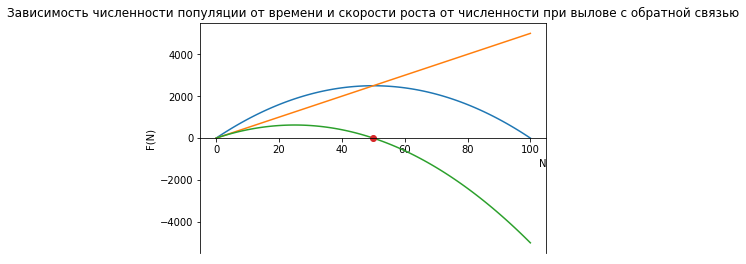

In [4]:
k = 50

def f2(n):
    return f(n) - k*n

fig2 = plt.figure()
axes = fig2.add_axes([0.2, 0.1, 0.8, 0.8])
func3 = [k*i for i in size]
func4 = [f(i)-k*i for i in size]
axes.plot(size, func)
axes.plot(size, func3)
axes.plot(size, func4)
axes.set_title('Зависимость численности популяции от времени и скорости роста от численности при вылове с обратной связью')
axes.set_xlabel('N', position=(1, 1000), horizontalalignment='right')
axes.set_ylabel('F(N)')
axes.spines['bottom'].set_position('center')
# axes.text('')
axes.plot(50, 0, 'o')

plt.show()

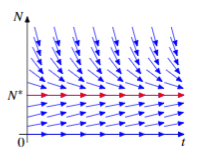

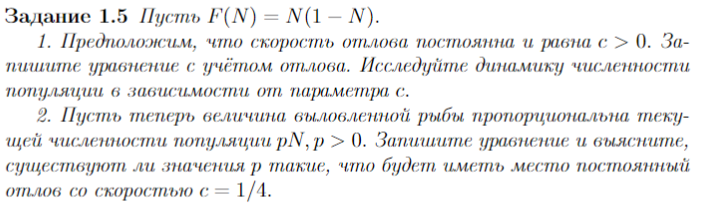

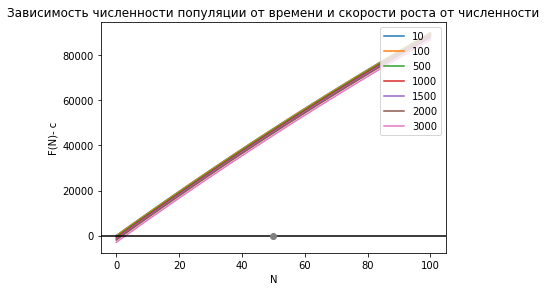

In [5]:
def f_new(n):
    return n*(1000-n)
    
fig_new = plt.figure()
axes = fig_new.add_axes([0.2, 0.1, 0.8, 0.8])
fun = []
c_set = [10, 100, 500, 1000, 1500, 2000, 3000]
for c in c_set:
    fun.append([f_new(i)-c for i in size])
for i in range(7):
    axes.plot(size, fun[i], label=c_set[i])
axes.set_title('Зависимость численности популяции от времени и скорости роста от численности')
axes.set_xlabel('N')
axes.set_ylabel('F(N)- с')
plt.axhline(color='black')
axes.legend(loc=1)
axes.plot(50, 0, 'o')

plt.show()

$$\dot N = N(1-N) - pN$$

$$\frac{dn}{dt} = -n^2 + (1-p)n$$

$$\frac{dn}{n^2 - (1-p)n} = -dt$$

$$\frac{dn}{(p-1)n} - \frac{dn}{(p-1)(n - (1-p))}= -dt$$

$$\frac1{(p-1)} \left( \frac{dn}n - \frac{dn}{n - (1-p)} \right)= -dt$$

$$\int \frac1{(p-1)} \left( \frac{dn}n - \frac{dn}{n - (1-p)} \right)=\int -dt$$

$$\frac1{(p-1)} \left(\int \frac{dn}n - \int \frac{dn}{n - (1-p)} \right)=\int -dt$$

$$\frac1{(p-1)} \left( ln(n) - ln(n-(1-p)) \right)=-t + c$$

$$ln(n) - ln(n-(1-p))=-(p-1)(t-c)$$

$$ln \left(\frac n{n-(1-p)} \right)=(1-p)(t-c)$$

$$\frac n{n-(1-p)}=e^{(1-p)(t-c)}$$

$$ 1 + \frac{1-p}{n-(1-p)}=e^{(1-p)(t-c)}$$

$$ \frac{1-p}{n-(1-p)}=e^{(1-p)(t-c)}-1$$

$$ n-1+p=\frac{1-p}{e^{(1-p)(t-c)}-1}$$

$$ n=\frac{1-p}{e^{(1-p)(t-c)}-1} -p+1$$

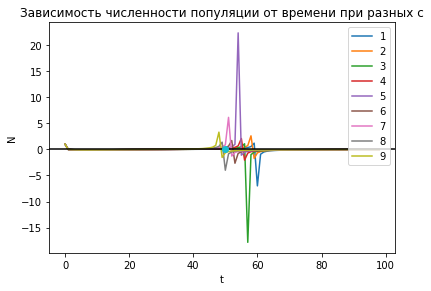

In [111]:
N = 1000

population = [[N] for j in range(9)]

def f_new(n, p):
    return n*(40-n) - p*n

    
size = [i for i in range(99)]
fig_new = plt.figure()
axes = fig_new.add_axes([0.2, 0.1, 0.8, 0.8])
fun = []
p_set = [i for i in range(1, 10)]
for j in range(9):
    for i in range(1, 99):
        population[j].append(population[j][-1] + f_new(i, p_set[j]))
population_dif = [[] for i in range(9)]
for j in range(9):
    for i in range(99):
        population_dif[j].append(1-(population[j][i]/population[j][i-1]))
for j in range(9):
    axes.plot(size, population_dif[j], label=p_set[j])
axes.set_title('Зависимость численности популяции от времени при разных с')
axes.set_xlabel('t')
axes.set_ylabel("N")
plt.axhline(color='black')
axes.legend(loc=1)
axes.plot(50, 0, 'o')

plt.show()

In [53]:
def n_new(t, p):
#     print(t)
    p=0
    return (1-p)/(2.7**((1-p)*t)-1)-p+1 

def n_num(n, p):
#     print(n)
    p=0
    return n*(1-n) - p*n

In [42]:
num_n = [10]
new_n = [10]
for i in range(1, 11):
#     print(i)
    new_n.append(new_n[-1] + n_new(new_n[-1], 2))
    num_n.append(num_n[-1] + n_num(num_n[-1], 2))
#     print(n_new(new_n[-1], 5), new_n)

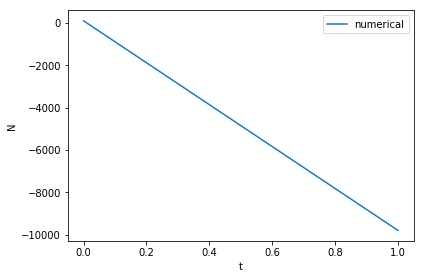

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 100

population = [[N] for j in range(9)]

def f_new(n, p):
    return n*(40-n) - p*n

    
size = [i for i in range(7)]
fig_new = plt.figure()
axes = fig_new.add_axes([0.1, 0.1, 0.8, 0.8])
control_n = [N]
num_n = [N]
for i in range(1, 7):
    control_n.append(control_n[-1] + n_new(i, 5))
    num_n.append(num_n[-1] + n_num(num_n[-1], 5))
axes.plot(size[:2], num_n[:2], label='numerical')
# axes.plot(size, control_n, label='analytical')

# axes.set_title('Сравнение аналитического и численного решений')
axes.set_xlabel('t')
axes.set_ylabel("N")
# plt.axhline(color='black')
axes.legend(loc=1)

plt.show()

$$n' = 2n$$
$$n=2.7^{2t}$$

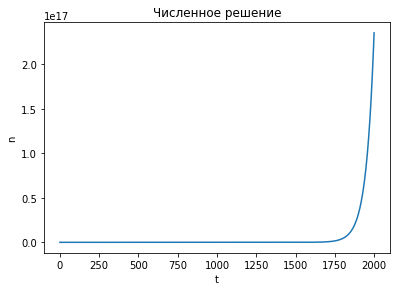

In [74]:
n = [1]
for i in range(2000):
    k1 = 2*n[-1]
    k2 = 2*(n[-1]+0.005*k1)
    k3 = 2*(n[-1]+0.005*k2)
    k4 = 2*(n[-1]+0.01*k3)
    n.append(n[-1] + 0.01/6*(k1 + 2*k2 + 2*k3 + k4))
    
fig_new = plt.figure()
axes = fig_new.add_axes([0.1, 0.1, 0.8, 0.8])
size = [i for i in range(2001)]
axes.plot(size, n)
axes.set_xlabel('t')
axes.set_ylabel("n")
axes.set_title('Численное решение')
plt.show()

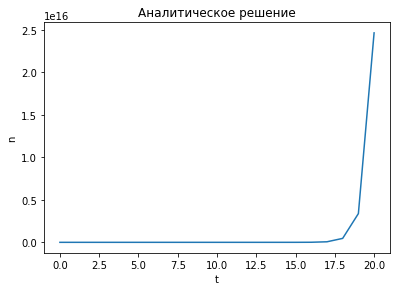

In [72]:
n = [0]
for i in range(20):
    n.append(2.7**(2*i))
    
fig_new = plt.figure()
axes = fig_new.add_axes([0.1, 0.1, 0.8, 0.8])
size = [i for i in range(21)]
axes.plot(size, n)
axes.set_xlabel('t')
axes.set_ylabel("n")
axes.set_title('Аналитическое решение')
plt.show()

$$n'=cos(t)$$

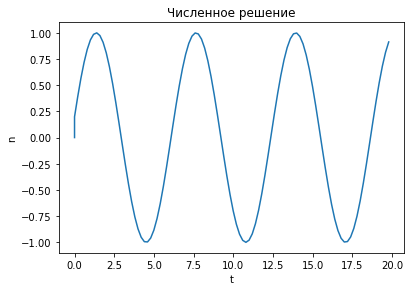

In [92]:
import math

n = [0]
L = 20
times = 100
h = L/times
size = [0]
t = -h
for i in range(times):
    t += h
    size.append(t)
    k1 = math.cos(t)
    k2 = math.cos(t+h/2)
    k3 = math.cos(t+h/2)
    k4 = math.cos(t+h)
    n.append(n[-1] + h/6*(k1 + 2*k2 + 2*k3 + k4))
fig_new = plt.figure()
axes = fig_new.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(size, n)
axes.set_xlabel('t')
axes.set_ylabel("n")
axes.set_title('Численное решение')
plt.show()

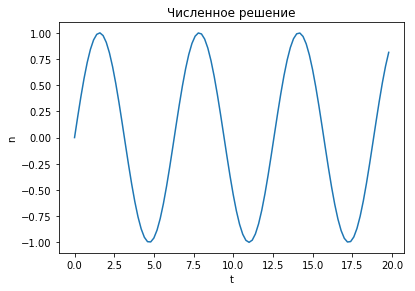

In [96]:
n = []
L = 20
h = L/times
size = [i*h for i in range(times)]
for i in size:
    n.append(math.sin(i))
fig_new = plt.figure()
axes = fig_new.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(size, n)
axes.set_xlabel('t')
axes.set_ylabel("n")
axes.set_title('Аналитическое решение')
plt.show()